In [0]:
import nltk

In [0]:
#nltk.download_shell()

In [0]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[100]

"ham\tPlease don't text me anymore. I have nothing else to say."

In [9]:
for mess_no, message in enumerate(messages[:10]):
  print(mess_no,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [0]:
import pandas as pd

In [0]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [0]:
messages['length'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


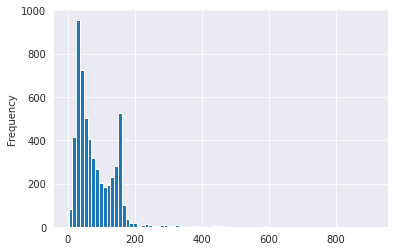

In [22]:
sns.set_style('darkgrid')
messages['length'].plot.hist(bins=80)

In [23]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fafc7c0ce48>,
      dtype=object)

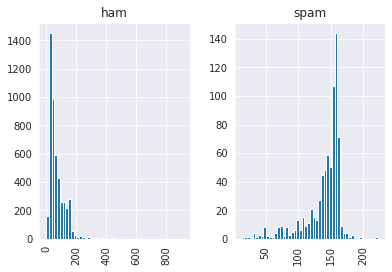

In [28]:
messages.hist(column='length', by='label', bins=50)

Text PreProcessing

In [0]:
import string

In [0]:
mess = 'Test message! Alert: it has punctuation'

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
no_punc = [c for c in mess if c not in string.punctuation]
no_punc

['T',
 'e',
 's',
 't',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'A',
 'l',
 'e',
 'r',
 't',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [0]:
from nltk.corpus import stopwords

In [39]:
stopwords.words('english')[0:5]   #show some stop words

['i', 'me', 'my', 'myself', 'we']

In [40]:
no_punc = ''.join(no_punc)
no_punc

'Test message Alert it has punctuation'

In [41]:
no_punc.split()

['Test', 'message', 'Alert', 'it', 'has', 'punctuation']

In [0]:
# Now just remove any stopwords
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [44]:
clean_mess

['Test', 'message', 'Alert', 'punctuation']

In [0]:
def text_process(mess):
   """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
   # Check characters to see if they are in punctuation
   nopunc = [char for char in mess if char not in string.punctuation]

   # Join the characters again to form the string.
   nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
   return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [47]:
messages.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [0]:
#vectorization

We'll do that in three steps using the bag-of-words model:

1.Count how many times does a word occur in each message (Known as term frequency)

2.Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3.Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [55]:
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

In [62]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [63]:
bow4 = bow_transformer.transform([mess4])
print(bow4)
print('\n')
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


(1, 11425)


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [64]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix

In [0]:
mess_bow = bow_transformer.transform(messages['message'])

In [66]:
print('Sape of Sparse Matrix:', mess_bow.shape)

Sape of Sparse Matrix: (5572, 11425)


In [67]:
mess_bow.nnz #amount of NonZero Occurences

50548

In [70]:
sparsity = (100.0 * mess_bow.nnz / (mess_bow.shape[0] * mess_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [0]:
#term frequency-inverse document frequency(tf-idf)
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
tfidf_transformer = TfidfTransformer().fit(mess_bow)

In [77]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


We'll go ahead and check what is the IDF (inverse document frequency) of the word "u" and of word "university"?

In [78]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [80]:
messages_tfidf = tfidf_transformer.transform(mess_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [0]:
#Training a model

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
spam_detect_model = MultinomialNB().fit(mess_bow,messages['label'])

In [85]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [86]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [87]:
messages['label'][3]

'ham'

In [88]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [89]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [0]:
#Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
pipeline = Pipeline([
                     ('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [94]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fafc780b378>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = pipeline.predict(msg_test)

In [0]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1527
        spam       0.69      1.00      0.81       145

    accuracy                           0.96      1672
   macro avg       0.84      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672

